## Data Analysis and Regression Modeling
1. Importing Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler


---
## 2. Loading and Checking the Data

In [5]:
# Define the path to the data file
data_file = "./data_mod.csv"

# Check if the file exists
if not os.path.isfile(data_file):
    raise FileNotFoundError(f"The file {data_file} does not exist.")

# Load the data into a DataFrame
data = pd.read_csv(data_file)
print(data.head())  # Display the first few rows of the dataset


     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0   313000         3       1.50         1340      7912     1.5
1  2384000         5       2.50         3650      9050     2.0
2   342000         3       2.00         1930     11947     1.0
3   420000         3       2.25         2000      8030     1.0
4   550000         4       2.50         1940     10500     1.0


---
## 3. Simple Linear Regression
a. Data Preparation

In [6]:
# Extract the features and target variable
x = data["sqft_living"]
y = data["price"]

# Initial regression coefficients
q0 = 0
q1 = 1.5

b. Data Normalization

In [7]:
# Normalize the features and target variable
x_normalized = (x - x.mean()) / x.max()
y_normalized = (y - y.mean()) / y.max()

c. Plotting Data and Regression Line

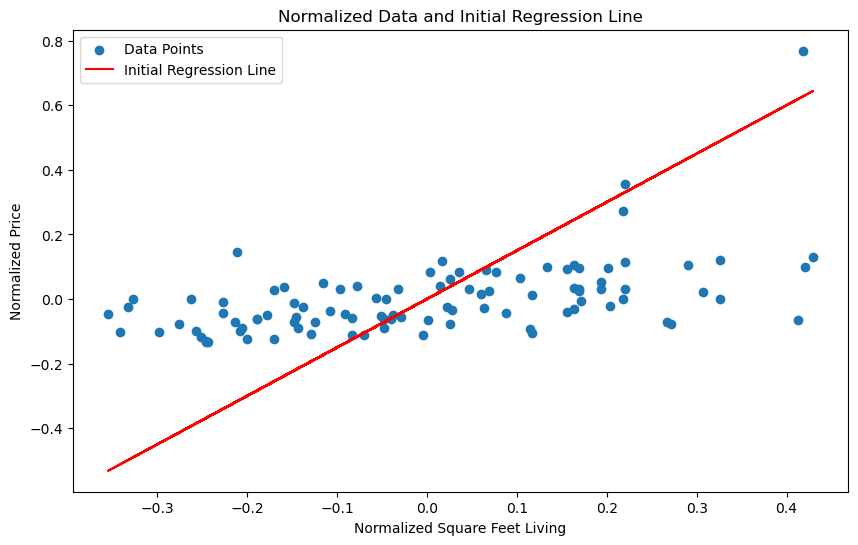

In [8]:
# Plot the normalized data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_normalized, y_normalized, label="Data Points")
plt.plot(x_normalized, q0 + q1 * x_normalized, label="Initial Regression Line", color="red")
plt.xlabel("Normalized Square Feet Living")
plt.ylabel("Normalized Price")
plt.legend()
plt.title("Normalized Data and Initial Regression Line")
plt.show()

d. Cost Function Calculation

In [9]:
# Calculate the cost function
m = len(x)
cost_function = (1 / (2 * m)) * np.sum((q0 + q1 * x_normalized - y_normalized) ** 2)
print(f"Initial Cost Function: {cost_function}")

Initial Cost Function: 0.03141547024009816


e. Gradient Descent Algorithm

In [10]:
# Gradient descent parameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# List to store the cost function values
cost_function_values = []

# Gradient descent loop
for i in range(iterations):
    # Calculate gradients
    theta0_gradient = (1 / m) * np.sum(q0 + q1 * x_normalized - y_normalized)
    theta1_gradient = (1 / m) * np.sum((q0 + q1 * x_normalized - y_normalized) * x_normalized)

    # Update coefficients
    q0 -= alpha * theta0_gradient
    q1 -= alpha * theta1_gradient

    # Calculate and store the cost function value
    cost = (1 / (2 * m)) * np.sum((q0 + q1 * x_normalized - y_normalized) ** 2)
    cost_function_values.append(cost)

# Print final regression coefficients
print(f"Final Regression Coefficients: q0 = {q0}, q1 = {q1}")

Final Regression Coefficients: q0 = 1.3956288425717277e-17, q1 = 1.1277472466812746


f. Cost Function Plot

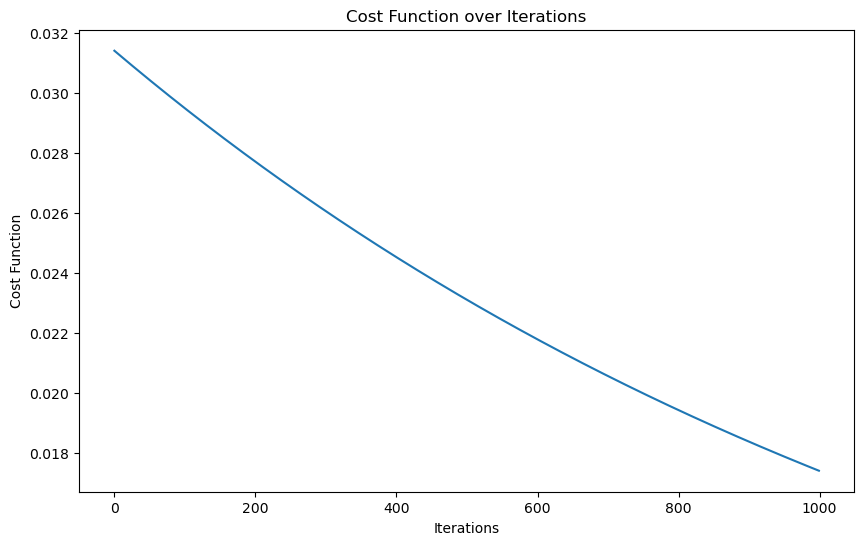

In [11]:
# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_function_values)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function over Iterations")
plt.show()

---
## 4. Multiple Linear Regression with PyTorch
a. Data Preparation

In [12]:
# Load the dataset again for multiple linear regression
dataset = pd.read_csv(data_file)
x = dataset.iloc[:, 1:].values  # Features
y = dataset.iloc[:, 0].values  # Target variable

b. Data Normalization

In [13]:
# Normalize features and target variable
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

c. Converting to PyTorch Tensors

In [14]:
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

d. Initializing Weights and Bia

In [15]:
# Initialize weights and bias
weights = torch.randn(x_tensor.shape[1], 1, requires_grad=True, dtype=torch.float32)
bias = torch.randn(1, requires_grad=True, dtype=torch.float32)

e. Defining Hypothesis and Cost Functions

In [16]:
def hypothesis(x, weights, bias):
    """Calculate the hypothesis function."""
    return x @ weights + bias

def cost_calculator(x, weights, bias, y):
    """Calculate the cost function."""
    m = len(y)
    preds = hypothesis(x, weights, bias)
    errors = preds - y
    cost = (1 / (2 * m)) * torch.sum(errors ** 2)
    return cost

f. Training with Gradient Descent

In [20]:
# Training parameters
learning_rate = 0.01
num_epochs = 1000

# Gradient descent loop
for epoch in range(num_epochs):
    # Forward pass: compute the predicted y
    y_pred = hypothesis(x_tensor, weights, bias)

    # Compute the loss
    loss = cost_calculator(x_tensor, weights, bias, y_tensor)

    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        bias -= learning_rate * bias.grad
        weights.grad.zero_()
        bias.grad.zero_()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3398
Epoch [200/1000], Loss: 0.3398
Epoch [300/1000], Loss: 0.3398
Epoch [400/1000], Loss: 0.3398
Epoch [500/1000], Loss: 0.3398
Epoch [600/1000], Loss: 0.3398
Epoch [700/1000], Loss: 0.3398
Epoch [800/1000], Loss: 0.3398
Epoch [900/1000], Loss: 0.3398
Epoch [1000/1000], Loss: 0.3398


g. Final Results

In [21]:
# Print final regression coefficients and cost
print(f"Final Bias: {bias.item()}")
for i, weight in enumerate(weights):
    print(f'q{i+1} = {weight.item()}')

final_loss = cost_calculator(x_tensor, weights, bias, y_tensor).item()
print(f"Final Cost Function: {final_loss}")

Final Bias: -1.4960990668555496e-08
q1 = 0.1602465808391571
q2 = -0.1949673444032669
q3 = 0.5098839402198792
q4 = -0.084063321352005
q5 = 0.14698657393455505
Final Cost Function: 0.33975744247436523
